In [1]:
from image import Image

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, MaxPool2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.python.client import device_lib
import tensorflow as tf

from sklearn.model_selection import train_test_split

C:\Users\Florian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Simple ANN

#### Load images and labels, split the train and test datasets

In [2]:
images, labels = Image.load_images("data", flatten=True)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, random_state=10, shuffle=True, test_size=.25)

#### Normalize the data and transform labels into categorical values

In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [6]:
num_pixels = X_train.shape[1]
num_classes = Y_test.shape[1]

#### Build the model

In [7]:
def ANN():
  # create model with 1 hidden layer
    model = Sequential()
    #Input and hidden layer
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #Output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy']) 
    return model

In [46]:
def ANN_2():
  # create model with 2 hidden layer
    model = Sequential()
    #Input and hidden layer
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #adding one more layer
    model.add(Dense(100,  kernel_initializer='normal', activation='relu'))
    #Output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy']) 
    return model

#### Train the model

In [42]:
#The model is fit over 10 epochs with updates every 100 images.

# build the model
model = ANN()
# Fit the model
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, batch_size=150, verbose=2)
#The test data is used as the validation dataset, allowing you to see the skill of the model as it trains.
#A verbose value of 2 is used to reduce the output to one line for each training epoch. 
#Finally, the test dataset is used to evaluate the model and a classification error rate is printed.

# Final evaluation of the model

scores = model.evaluate(X_test, Y_test, verbose=0)
print("Final accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 2250 samples, validate on 750 samples
Epoch 1/20
 - 22s - loss: 6.8864 - acc: 0.3533 - val_loss: 5.3664 - val_acc: 0.5040
Epoch 2/20
 - 3s - loss: 4.0682 - acc: 0.5658 - val_loss: 3.2470 - val_acc: 0.6307
Epoch 3/20
 - 3s - loss: 2.3213 - acc: 0.7267 - val_loss: 2.2794 - val_acc: 0.7760
Epoch 4/20
 - 4s - loss: 1.7465 - acc: 0.8324 - val_loss: 1.7823 - val_acc: 0.8133
Epoch 5/20
 - 3s - loss: 1.1197 - acc: 0.8604 - val_loss: 0.8127 - val_acc: 0.8253
Epoch 6/20
 - 4s - loss: 0.4278 - acc: 0.9169 - val_loss: 0.4681 - val_acc: 0.9067
Epoch 7/20
 - 3s - loss: 0.2454 - acc: 0.9596 - val_loss: 0.3390 - val_acc: 0.9347
Epoch 8/20
 - 3s - loss: 0.1908 - acc: 0.9809 - val_loss: 0.3036 - val_acc: 0.9387
Epoch 9/20
 - 3s - loss: 0.1637 - acc: 0.9884 - val_loss: 0.2567 - val_acc: 0.9520
Epoch 10/20
 - 3s - loss: 0.1490 - acc: 0.9916 - val_loss: 0.2357 - val_acc: 0.9587
Epoch 11/20
 - 4s - loss: 0.1431 - acc: 0.9920 - val_loss: 0.2316 - val_acc: 0.9587
Epoch 12/20
 - 3s - loss: 0.1407 - ac

In [47]:
#The model is fit over 10 epochs with updates every 100 images.

# build the model
model_2 = ANN_2()
# Fit the model
hist_2 = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, batch_size=100, verbose=2)
#The test data is used as the validation dataset, allowing you to see the skill of the model as it trains.
#A verbose value of 2 is used to reduce the output to one line for each training epoch. 
#Finally, the test dataset is used to evaluate the model and a classification error rate is printed.

# Final evaluation of the model

scores = model.evaluate(X_test, Y_test, verbose=0)
print("Final accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 2250 samples, validate on 750 samples
Epoch 1/20
 - 14s - loss: 0.1335 - acc: 0.9920 - val_loss: 0.2187 - val_acc: 0.9613
Epoch 2/20
 - 3s - loss: 0.1332 - acc: 0.9920 - val_loss: 0.2203 - val_acc: 0.9613
Epoch 3/20
 - 3s - loss: 0.1328 - acc: 0.9920 - val_loss: 0.2175 - val_acc: 0.9640
Epoch 4/20
 - 3s - loss: 0.1325 - acc: 0.9920 - val_loss: 0.2190 - val_acc: 0.9600
Epoch 5/20
 - 3s - loss: 0.1323 - acc: 0.9920 - val_loss: 0.2176 - val_acc: 0.9640
Epoch 6/20
 - 3s - loss: 0.1320 - acc: 0.9920 - val_loss: 0.2178 - val_acc: 0.9627
Epoch 7/20
 - 4s - loss: 0.1319 - acc: 0.9920 - val_loss: 0.2180 - val_acc: 0.9627
Epoch 8/20
 - 3s - loss: 0.1317 - acc: 0.9920 - val_loss: 0.2167 - val_acc: 0.9640
Epoch 9/20
 - 3s - loss: 0.1315 - acc: 0.9920 - val_loss: 0.2159 - val_acc: 0.9640
Epoch 10/20
 - 3s - loss: 0.1314 - acc: 0.9920 - val_loss: 0.2164 - val_acc: 0.9627
Epoch 11/20
 - 3s - loss: 0.1312 - acc: 0.9920 - val_loss: 0.2164 - val_acc: 0.9627
Epoch 12/20
 - 3s - loss: 0.1311 - ac

#### Use the model for prediction on another dataset

In [60]:
X_val, Y_val = Image.load_images("data_old", flatten=True)
X_val = X_val.astype('float32') / 255
Y_val = np_utils.to_categorical(Y_val)

In [61]:
Y_predict = model.predict(X_val)
Y_predict_2 = model_2.predict(X_val)

In [64]:
accuracy = sum(Y_predict.argmax(axis=1) == Y_val.argmax(axis=1)) / Y_val.shape[0]
accuracy_2 = sum(Y_predict_2.argmax(axis=1) == Y_val.argmax(axis=1)) / Y_val.shape[0]
print("Accuracy with the 1st model : %.2f%%" % (accuracy*100))
print("Accuracy with the 2nd model : %.2f%%" % (accuracy_2*100))

Accuracy with the 1st model : 49.83%
Accuracy with the 2nd model : 17.87%


#### Graphics

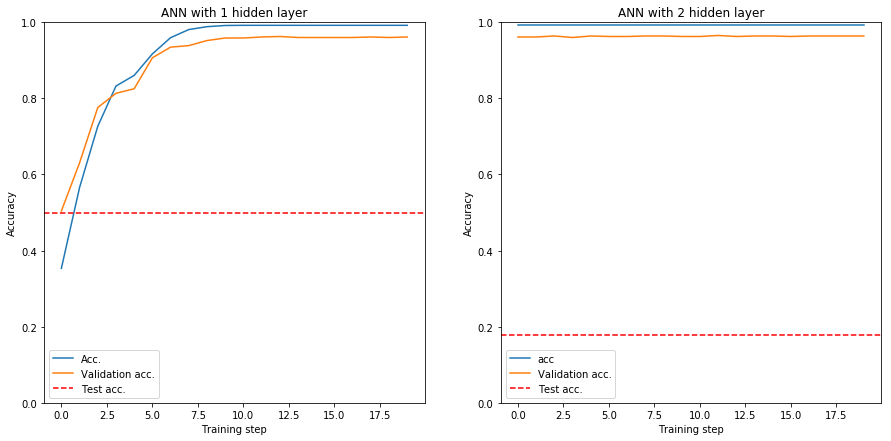

In [67]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(hist.history['acc'], label='Acc.')
ax1.plot(hist.history['val_acc'], label='Validation acc.')
ax1.axhline(accuracy, ls='--', c='r', label='Test acc.')
ax1.set_ylim([0,1])
ax1.set_xlabel('Training step')
ax1.set_ylabel('Accuracy')
ax1.set_title('ANN with 1 hidden layer')
ax1.legend()

ax2.plot(hist_2.history['acc'], label='acc')
ax2.plot(hist_2.history['val_acc'], label='Validation acc.')
ax2.axhline(accuracy_2, ls='--', c='r', label='Test acc.')
ax2.set_ylim([0,1])
ax2.set_xlabel('Training step')
ax2.set_ylabel('Accuracy')
ax2.set_title('ANN with 2 hidden layer')
ax2.legend()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

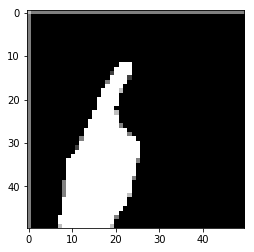

In [10]:
plt.imshow(np.reshape(X_val[0], (50, 50)), cmap=plt.get_cmap('gray'))
plt.show

In [ ]:
for i in range(len(classes)):
    predict = np.argmax(classes[i])
    real = np.argmax(Y_test[i])
    if predict!= real:
        print("pred : {}\treal : {}".format(predict, real))